In [1]:
import sys

import matplotlib.pyplot as plt
%config BackendInline.figure_format='eps'

plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn import cluster

import mlgrad.func as func
import mlgrad.distance as distance
import mlgrad.weights as weights
import mlgrad.averager as averager
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter
from mlgrad.af import averaging_function

from mlgrad import ws_average_it, averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, drisk

/tmp/ipykernel_19019/4203073681.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])
/tmp/ipykernel_19019/4203073681.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])
/tmp/ipykernel_19019/4203073681.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain avai

(200, 2) (100, 2)


/tmp/ipykernel_19019/1649612134.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:,0], X1[:,1], s=16, cmap=plt.cm.rainbow)


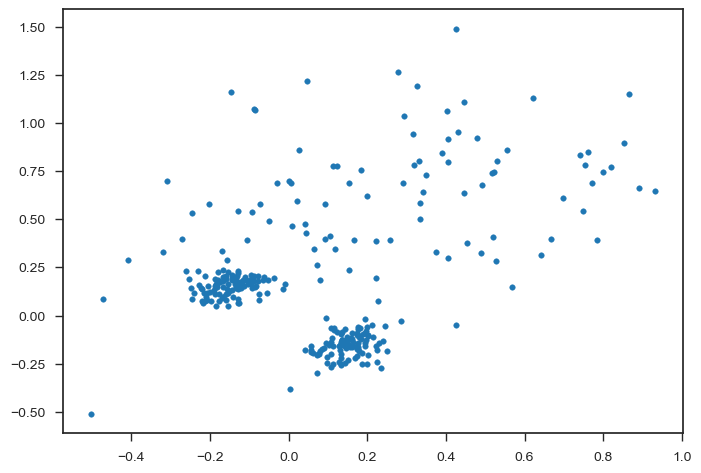

In [2]:
S = 100.
X_1, Y_1 = make_blobs(n_samples=200, n_features=2, 
                    centers=[(-15,15), (15,-15)], 
                    cluster_std=[5.0, 5.0])
Y_1 += 1

X_2, Y_2 = make_blobs(n_samples=100, n_features=2, 
                    centers=[(10,40),(40, 70)], 
                    cluster_std=[30., 30.])
Y_2 = 3
print(X_1.shape, X_2.shape)
X1 = np.vstack([X_1, X_2])
Y1 = np.hstack([Y_1, Y_2])
X1 /= S

plt.scatter(X1[:,0], X1[:,1], s=16, cmap=plt.cm.rainbow)
plt.show()

(200, 2) (190, 2)


/tmp/ipykernel_19019/2319753573.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2[:,0], X2[:,1], s=16, cmap=plt.cm.rainbow)


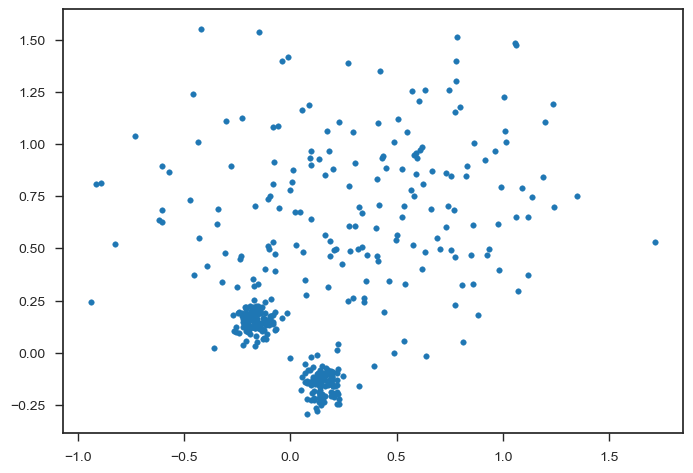

In [3]:
X_1, Y_1 = make_blobs(n_samples=200, n_features=2, 
                    centers=[(-15,15), (15,-15)], 
                    cluster_std=[5.0, 5.0])
Y_1 += 1

X_2, Y_2 = make_blobs(n_samples=190, n_features=2, 
                    centers=[(0,70),(60, 70)], 
                    cluster_std=[40., 40.])
Y_2 = 3
print(X_1.shape, X_2.shape)
X2 = np.vstack([X_1, X_2])
Y2 = np.hstack([Y_1, Y_2])
X2 /= S

plt.scatter(X2[:,0], X2[:,1], s=16, cmap=plt.cm.rainbow)
plt.show()

In [4]:
avrfunc1 = averaging_function("WM", func.QuantileFunc(0.66, func.Sqrt(0.001)))
hcd_rob1 = mlocation_scatter.MLocationsScattersEstimator(avrfunc1, avragg.Minimal(), 2, 
                                tol=1.0e-9)

2


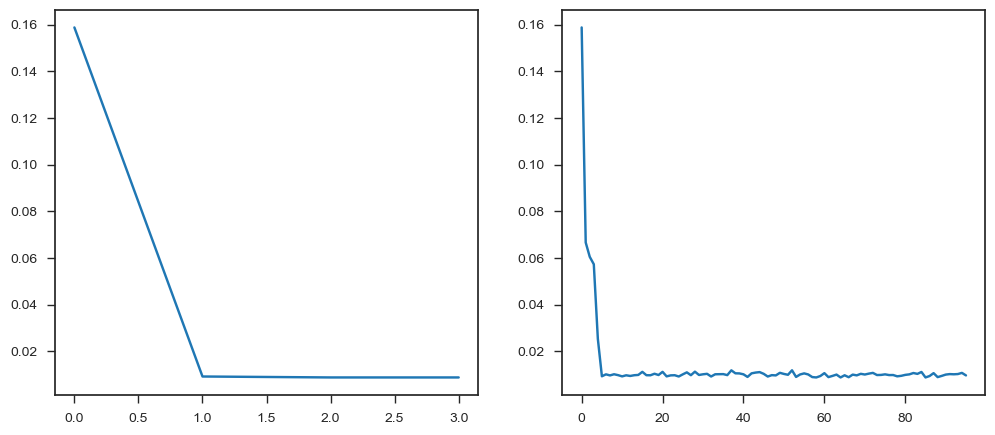

In [5]:
hcd_rob1.fit(X1) #, only='locations')
print(hcd_rob1.Ks)

params1 = np.array(hcd_rob1.locs)
Y1 = np.array(hcd_rob1.evaluate(X1))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hcd_rob1.dvals2)
plt.subplot(1,2,2)
plt.plot(hcd_rob1.dvals)
plt.show()

In [11]:
avrfunc2 = averaging_function("WM", func.QuantileFunc(0.51, func.Sqrt(0.001)))
hcd_rob2 = mlocation_scatter.MLocationsScattersEstimator(avrfunc2, avragg.Minimal(), 2, 
                                    tol=1.0e-9, n_iter=1000)

1


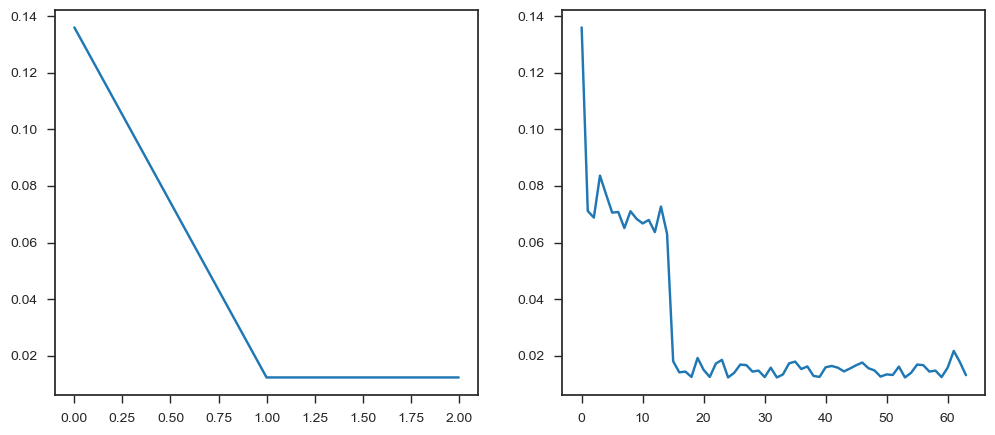

In [12]:
hcd_rob2.fit(X2) #, only='locations')
print(hcd_rob2.Ks)

params2 = np.array(hcd_rob2.locs)
Y2 = np.array(hcd_rob2.evaluate(X2))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hcd_rob2.dvals2)
plt.subplot(1,2,2)
plt.plot(hcd_rob2.dvals)
plt.show()

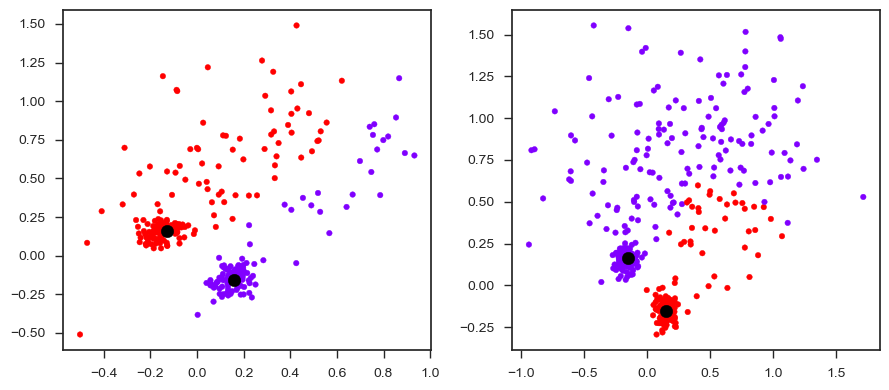

In [13]:
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
# plt.title(r"IR-KMeans-M1, 33%")
plt.scatter(X1[:,0], X1[:,1], s=16, c=Y1, cmap=plt.cm.rainbow)
plt.scatter(params1[:,0], params1[:,1], c='k', s=81)
plt.subplot(1, 2, 2)
# plt.title("KMeans, %s%%" % (100*200//400))
plt.scatter(X2[:,0], X2[:,1], s=16, c=Y2, cmap=plt.cm.rainbow)
plt.scatter(params2[:,0], params2[:,1], c='k', s=81)

plt.tight_layout()
plt.savefig('fig/robust_kmeans_mls_1.eps')
plt.show()


In [ ]:
for i in range(2):
    print(np.asarray(hcd_rob1.distfuncs[i].S))

In [ ]:
D1 = hcd_rob1.calc_distances()
D2 = hcd_rob2.calc_distances()

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
plt.hist(D1, bins=20)
plt.minorticks_on()
plt.subplot(1, 2, 2)
plt.hist(D2, bins=20)
plt.minorticks_on()
plt.show()

In [ ]:
I = [k for k, d in enumerate(D1) if d <= 10]

In [ ]:
X11 = np.array([X1[k] for k in I])

In [ ]:
plt.scatter(X11[:,0], X11[:,1], s=16, cmap=plt.cm.rainbow)
plt.show()

In [ ]:
# avrfunc11 = averager_it(func.QuantileFunc(0.5, func.Sqrt(0.001)))
avrfunc11 = avragg.ArithMean()
hcd_rob11 = mlocation_scatter.MLocationsScattersEstimator(avrfunc11, 2, 
                                    tol=1.0e-9, n_iter=2000, n_step=10, h=0.01)
hcd_rob11.fit(X11)
print(hcd_rob11.Ks)

params11 = np.array(hcd_rob11.locs)
Y11 = np.array(hcd_rob11.evaluate(X11))

plt.plot(hcd_rob11.dvals)
plt.show()

In [ ]:
plt.scatter(X11[:,0], X11[:,1], s=16, c=Y11, cmap=plt.cm.rainbow)
plt.scatter(params11[:,0], params11[:,1], c='k', s=81)
plt.show()

In [ ]:
for i in range(2):
    print(np.asarray(hcd_rob11.scatters[i]))

In [ ]:
200/390